# Reading and Homework (HW) #1 Problems and Submissions

There are 12 problems to be submitted in the 1st Batch of HW as follows all KJ and HA. 

## Reading Assignments

KJ Chapters 1, 2, 3

HA Chapters 1, 2, 6, 7, 8

## Problem Assignments

HA 2.1 and HA 2.3

HA 6.2

KJ 3.1 and 3.2

HA 7.1, 7.2 and 7.3

HA 8.1, 8.2, 8.6. 8.8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose

### HA 2.1

Use the help function to explore what the series gold, woolyrnq and gas represent.

a. Use autoplot() to plot each of these in separate plots.  
b. What is the frequency of each series? Hint: apply the frequency() function.  
c. Use which.max() to spot the outlier in the gold series. Which observation was it?

In [2]:
gold = pd.read_csv('data/gold.csv')
woolyrnq = pd.read_csv('data/woolyrnq.csv')
gas = pd.read_csv('data/gas.csv')

In [3]:
display(
    gold.head(),
    woolyrnq.head(),
    gas.head()
)

,time,series
0,1,306.25
1,2,299.50
2,3,303.45
3,4,296.75
4,5,304.40


,time,series
0,1965.00,6172
1,1965.25,6709
2,1965.50,6633
3,1965.75,6660
4,1966.00,6786


,time,series
0,1956.000000,1709
1,1956.083333,1646
2,1956.166667,1794
3,1956.250000,1878
4,1956.333333,2173


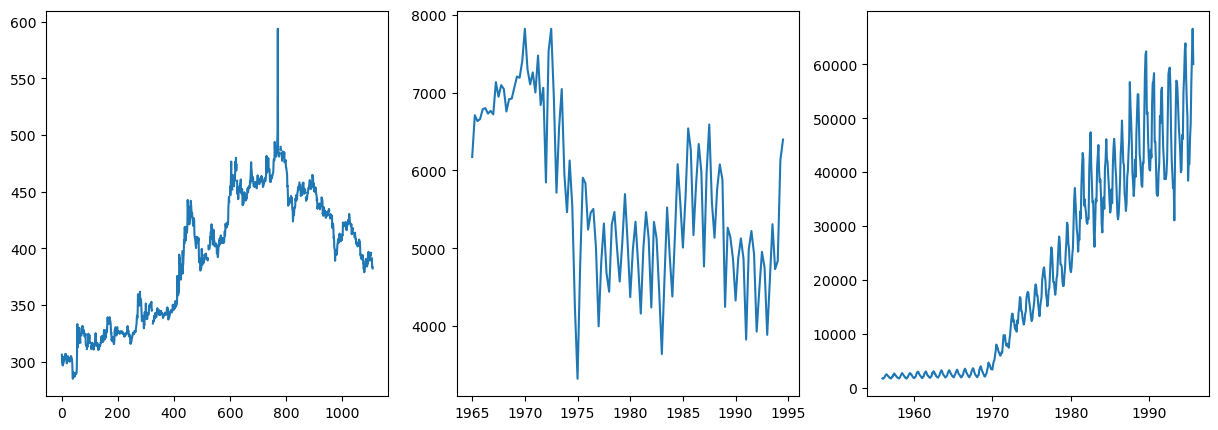

In [4]:
# a. Use autoplot() to plot each of these in separate plots.
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))
ax1.plot('time', 'series', data = gold)
ax2.plot('time', 'series', data = woolyrnq)
ax3.plot('time', 'series', data = gas)

In [5]:
# b. What is the frequency of each series? Hint: apply the frequency() function.
print(
    f"Gold Frequency: {round(1 / (gold.loc[1, 'time'] % 1), 5)}",
    f"\nWoolyrnq Frequency: {round(1 / (woolyrnq.loc[1, 'time'] % 1), 5)}",
    f"\nGas Frequency: {round(1 / (gas.loc[1, 'time'] % 1), 5)}"
)

Gold Frequency: inf 
Woolyrnq Frequency: 4.0 
Gas Frequency: 12.0


C:\Users\Keith\AppData\Local\Temp\ipykernel_13492\3019396774.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  f"Gold Frequency: {round(1 / (gold.loc[1, 'time'] % 1), 5)}",


In [6]:
# c.Use which.max() to spot the outlier in the gold series. Which observation was it?
display(
    gold
    .loc[gold['series'] == max(gold['series']), ],
    
    woolyrnq
    .assign(year = (woolyrnq['time'] // 1).astype(int),
            quarter = round(1 + woolyrnq['time'] % 1 * 4, 0).astype(int))
    .loc[woolyrnq['series'] == max(woolyrnq['series']), ],
    
    gas
    .assign(year = (gas['time'] // 1).astype(int),
            month = round(1 + gas['time'] % 1 * 12, 0).astype(int))
    .loc[gas['series'] == max(gas['series']), ],
)

,time,series
769,770,593.7


,time,series,year,quarter
20,1970.0,7819,1970,1
30,1972.5,7819,1972,3


,time,series,year,month
474,1995.5,66600,1995,7


## HA 2.3

Download some monthly Australian retail data from the book website. These represent retail sales in various categories for different Australian states, and are stored in a MS-Excel file.

a. Read in the data  
b. Select one of the time series  
c. Explore your chosen retail time series using the following functions:
autoplot(), ggseasonplot(), ggsubseriesplot(), gglagplot(), ggAcf()

Can you spot any seasonality, cyclicity and trend? What do you learn about the series?

In [7]:
# a. Read in the data
retail = pd.read_excel('data/retail.xlsx', engine = 'openpyxl', skiprows = 1)

In [8]:
retail.head()

,Series ID,A3349335T,A3349627V,A3349338X,A3349398A,A3349468W,A3349336V,A3349337W,A3349397X,A3349399C,...,A3349333L,A3349860R,A3349464L,A3349389X,A3349461F,A3349788J,A3349547V,A3349388W,A3349870V,A3349396W
0,1982-04-01,303.1,41.7,63.9,408.7,65.8,91.8,53.6,211.3,94.0,...,460.1,135.1,64.9,125.6,153.5,479.1,146.3,196.1,342.4,3396.4
1,1982-05-01,297.8,43.1,64.0,404.9,65.8,102.6,55.4,223.8,105.7,...,502.6,134.9,67.7,128.7,154.8,486.1,145.5,196.6,342.1,3497.9
2,1982-06-01,298.0,40.3,62.7,401.0,62.3,105.0,48.4,215.7,95.1,...,443.8,128.2,65.5,125.0,148.8,467.5,140.2,188.5,328.7,3357.8
3,1982-07-01,307.9,40.9,65.6,414.4,68.2,106.0,52.1,226.3,95.3,...,459.1,129.9,68.5,136.6,156.1,491.1,146.5,192.0,338.5,3486.8
4,1982-08-01,299.2,42.1,62.6,403.8,66.0,96.9,54.2,217.1,82.8,...,438.4,133.0,65.2,134.7,152.8,485.7,138.8,192.7,331.5,3355.9


In [9]:
retail = retail.rename({'Series ID':'Date'}, axis = 1)
retail = retail.set_index('Date')
retail.head()

,A3349335T,A3349627V,A3349338X,A3349398A,A3349468W,A3349336V,A3349337W,A3349397X,A3349399C,A3349874C,...,A3349333L,A3349860R,A3349464L,A3349389X,A3349461F,A3349788J,A3349547V,A3349388W,A3349870V,A3349396W
Date,,,,,,,,,,,,,,,,,,,,,
1982-04-01,303.1,41.7,63.9,408.7,65.8,91.8,53.6,211.3,94.0,32.7,...,460.1,135.1,64.9,125.6,153.5,479.1,146.3,196.1,342.4,3396.4
1982-05-01,297.8,43.1,64.0,404.9,65.8,102.6,55.4,223.8,105.7,35.6,...,502.6,134.9,67.7,128.7,154.8,486.1,145.5,196.6,342.1,3497.9
1982-06-01,298.0,40.3,62.7,401.0,62.3,105.0,48.4,215.7,95.1,32.5,...,443.8,128.2,65.5,125.0,148.8,467.5,140.2,188.5,328.7,3357.8
1982-07-01,307.9,40.9,65.6,414.4,68.2,106.0,52.1,226.3,95.3,33.5,...,459.1,129.9,68.5,136.6,156.1,491.1,146.5,192.0,338.5,3486.8
1982-08-01,299.2,42.1,62.6,403.8,66.0,96.9,54.2,217.1,82.8,29.4,...,438.4,133.0,65.2,134.7,152.8,485.7,138.8,192.7,331.5,3355.9


In [10]:
# b. Select one of the time series
myts = retail['A3349627V']
myts.head()

Date
1982-04-01    41.7
1982-05-01    43.1
1982-06-01    40.3
1982-07-01    40.9
1982-08-01    42.1
Name: A3349627V, dtype: float64

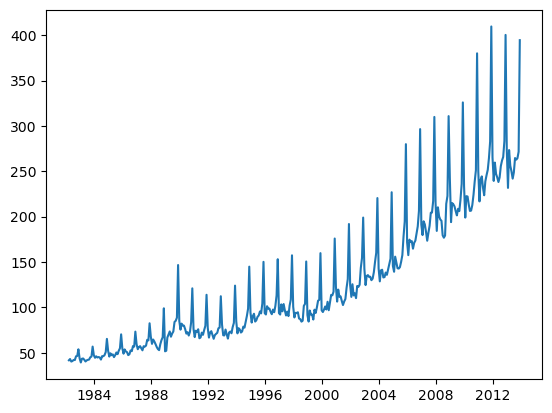

In [11]:
# c. Explore the series

## autoplot()

plt.plot(myts)

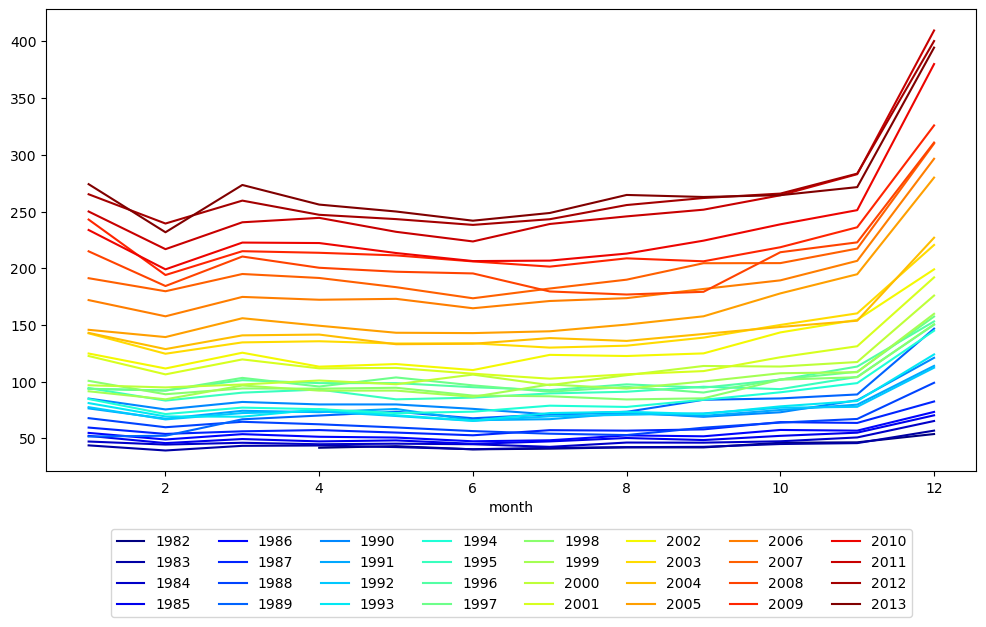

In [12]:
## ggseasonplot()

myts = pd.DataFrame(myts).assign(year = myts.index.year,
                                 month = myts.index.month,
                                 month_name = myts.index.strftime('%b'))
color_gradient = np.linspace(0, 1, len(myts.index.year.unique()))

fig, ax = plt.subplots(figsize=(12,6))
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(color_gradient)))
for label, ts in myts.groupby(myts.index.year):
    ts.plot('month', 'A3349627V', ax = ax, label = label)
plt.legend(loc = 'lower center', ncols = 8, bbox_to_anchor = (0.5, -0.33))
plt.show()

In [13]:
myts

,A3349627V,year,month,month_name
Date,,,,
1982-04-01,41.7,1982,4,Apr
1982-05-01,43.1,1982,5,May
1982-06-01,40.3,1982,6,Jun
1982-07-01,40.9,1982,7,Jul
1982-08-01,42.1,1982,8,Aug
...,...,...,...,...
2013-08-01,264.6,2013,8,Aug
2013-09-01,262.8,2013,9,Sep
2013-10-01,264.4,2013,10,Oct


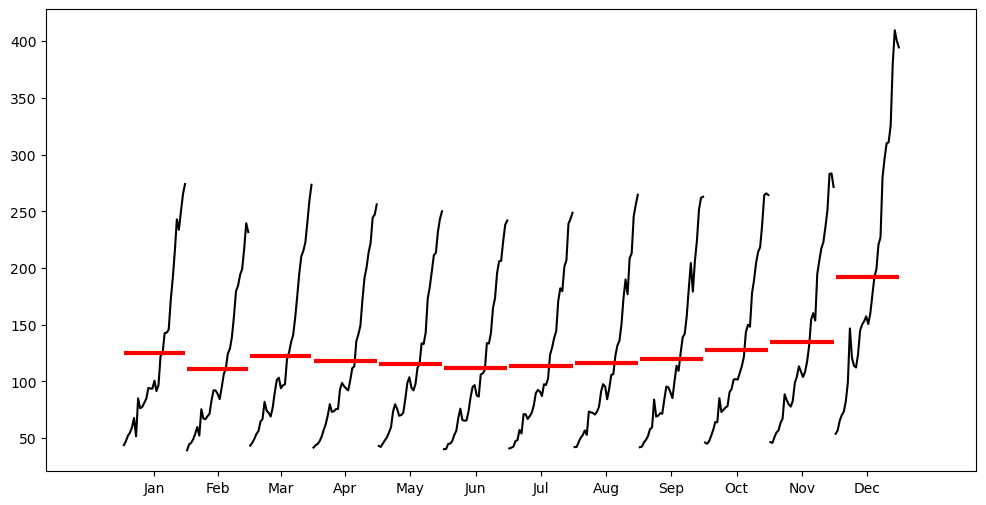

In [14]:
## ggsubseriesplot()

fig, ax = plt.subplots(figsize = (12, 6))
month_plot(myts['A3349627V'], ax = ax)
plt.show()

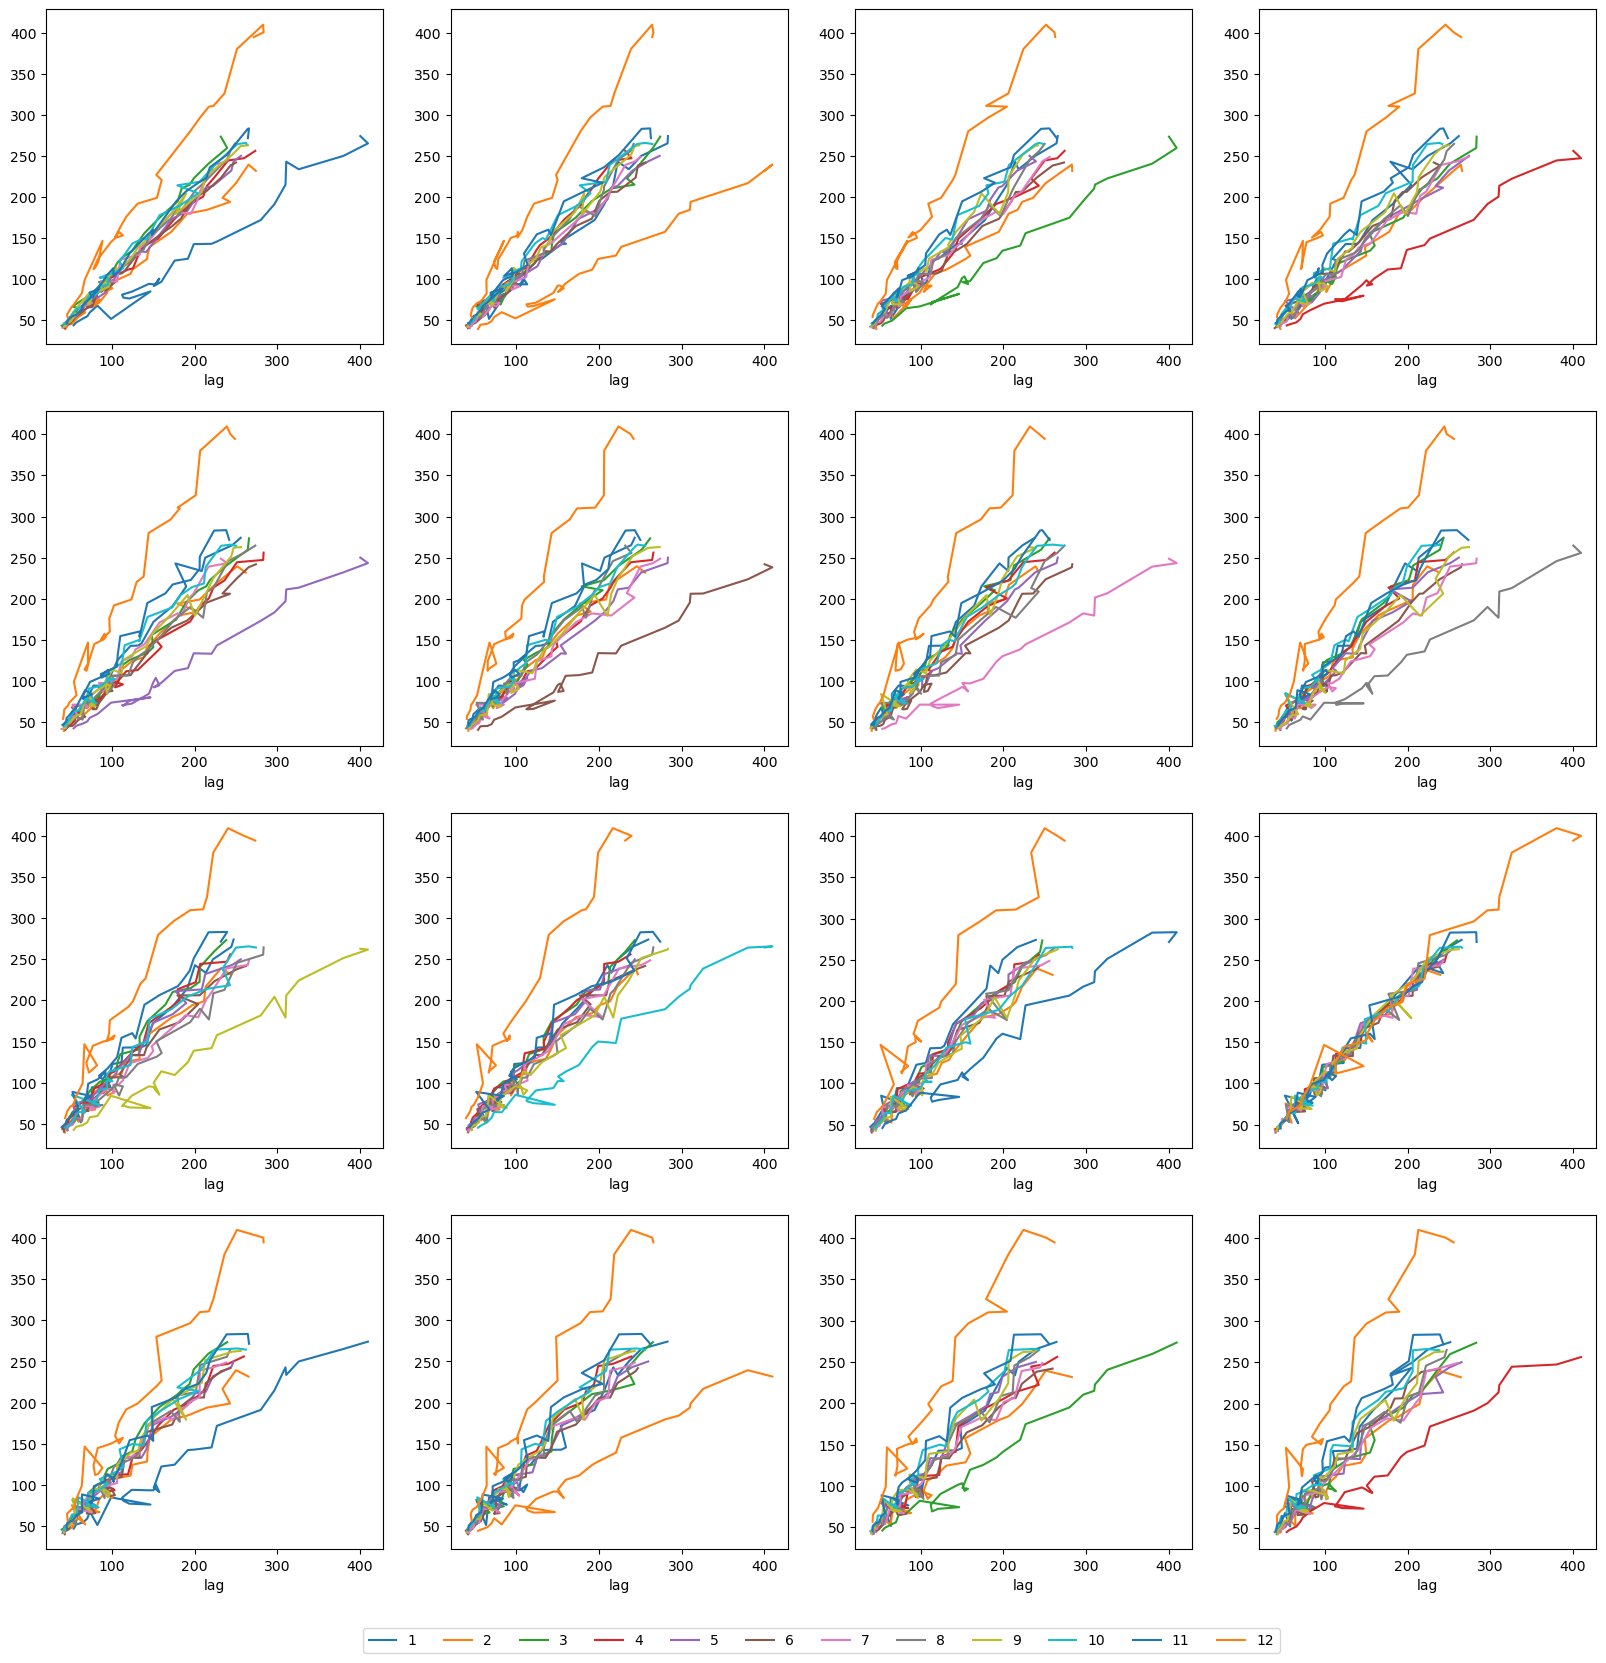

In [15]:
## gglagplot()

plot_grid = []
for i in range(4):
    for j in range(4):
        plot_grid.append([i, j])
        
fig, ax = plt.subplots(4, 4, figsize = (20, 20))
for k in range(1, 17):
    myts_with_lag = myts.assign(lag =  myts['A3349627V'].shift(k))
    subplot = ax[ plot_grid[k-1][0], plot_grid[k-1][1] ]
    for label, ts in myts_with_lag.groupby(myts_with_lag.index.month):
        ts.plot('lag', 'A3349627V', ax = subplot, label = label)
    subplot.legend('', frameon = False)
subplot.legend(loc = 'lower center', ncol = 12, bbox_to_anchor = (-1.3, -0.33))
plt.show()

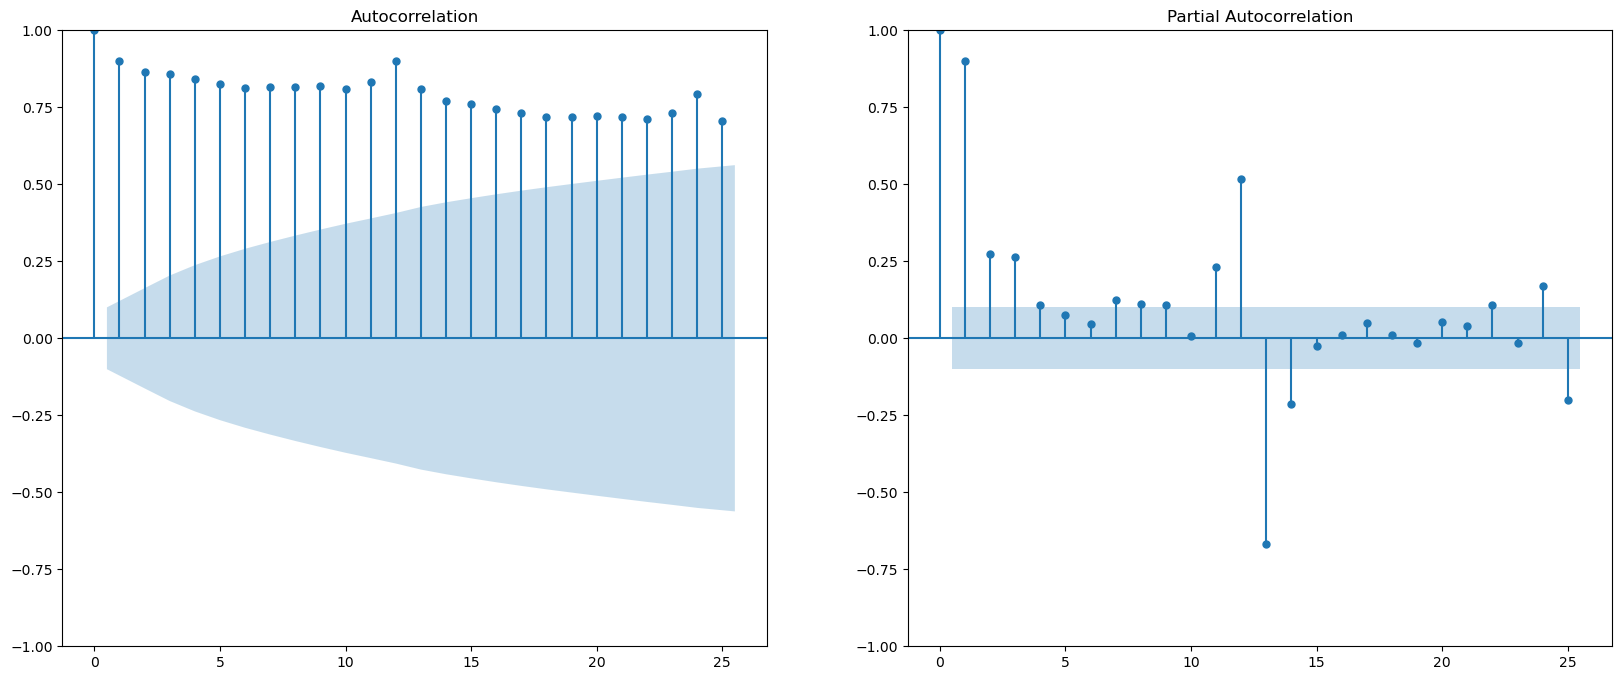

In [16]:
## ggAcf()

fig, ax = plt.subplots(1, 2, figsize = (20, 8))
plot_acf(myts['A3349627V'], lags = 25, ax = ax[0])
plot_pacf(myts['A3349627V'], lags = 25, ax = ax[1], method = 'ywm')
plt.show()

## HA 6.2

The plastics data set consists of the monthly sales (in thousands) of product A for a plastics manufacturer for five years.

a. Plot the time series of sales of product A. Can you identify seasonal fluctuations and/or a trend-cycle?  
b. Use a classical multiplicative decomposition to calculate the trend-cycle and seasonal indices.  
c. Do the results support the graphical interpretation from part a?  
d. Compute and plot the seasonally adjusted data.  
e. Change one observation to be an outlier (e.g., add 500 to one observation), and recompute the seasonally adjusted data. What is the effect of the outlier?   
f. Does it make any difference if the outlier is near the end rather than in the middle of the time series?

In [17]:
plastics = pd.read_csv('data/plastics.csv') #, index_col = 'time')

In [18]:
print(f"Frequency: {round(1 / (plastics.loc[1, 'time'] % 1), 5)}",
      f"\nLength of Series: {len(plastics)}")

Frequency: 12.0 
Length of Series: 60


In [19]:
plastics = (
    plastics
    .assign(year = (2000 + plastics['time'] // 1).astype(int),
            month = lambda x: round(1 + x.time % 1 * 12, 0).astype(int),
            date = lambda x: (x.year.astype(str) + '-' + x.month.map("{:02d}".format) + '-01').astype(np.datetime64))
    .drop(['time', 'year', 'month'], axis = 1)
    .set_index('date')
    .asfreq('MS')
)

In [20]:
plastics.head()

,series
date,
2001-01-01,742
2001-02-01,697
2001-03-01,776
2001-04-01,898
2001-05-01,1030


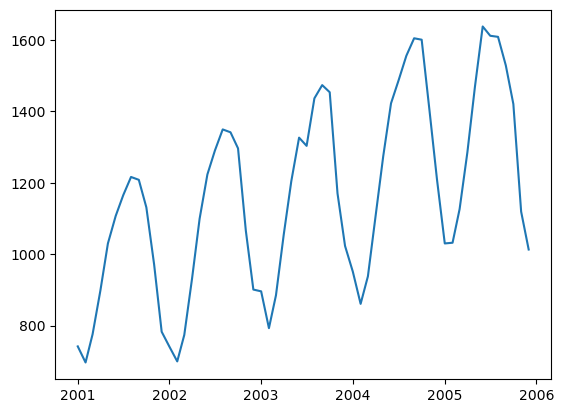

In [21]:
# a. Plot the time series of sales of product A. Can you identify seasonal fluctuations and/or a trend-cycle?

plt.plot(plastics)
plt.show()

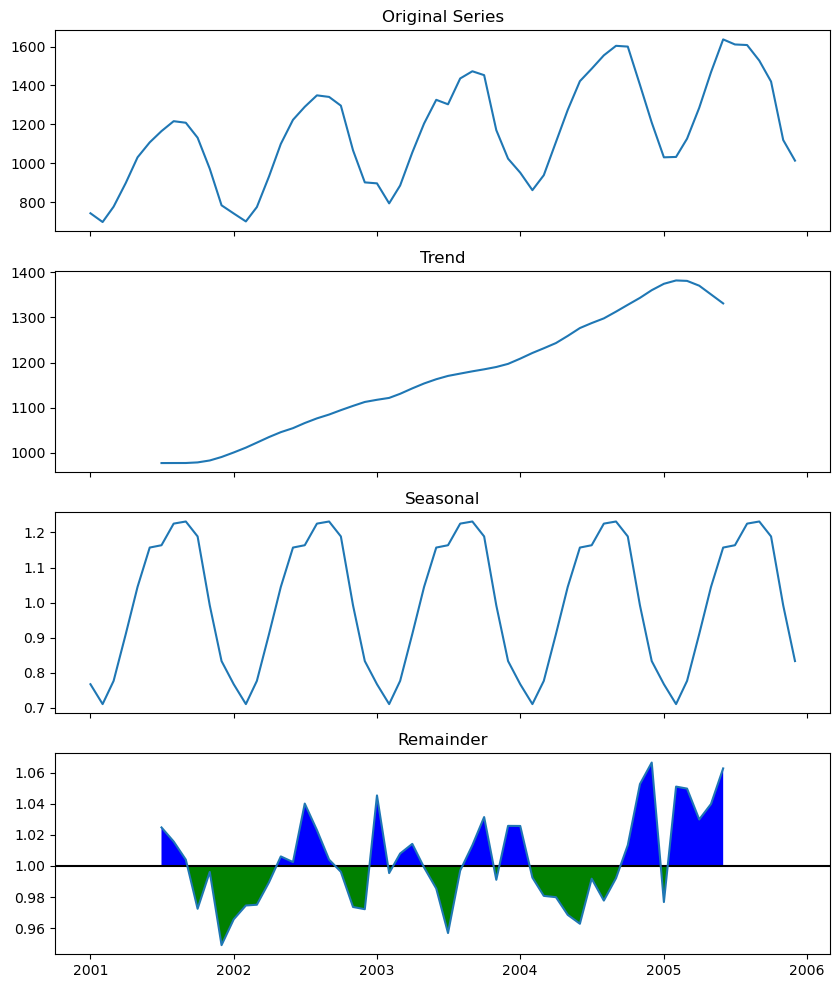

In [22]:
# b. Use a classical multiplicative decomposition to calculate the trend-cycle and seasonal indices.

classical_decomp = seasonal_decompose(plastics, model='multiplicative', period = 12)

# print(f'Trend Component:'

fig, ax = plt.subplots(4, 1, figsize = (10,12), sharex = True)

ax[0].plot(classical_decomp.observed)
ax[0].set_title('Original Series')

ax[1].plot(classical_decomp.trend)
ax[1].set_title('Trend')

ax[2].plot(classical_decomp.seasonal)
ax[2].set_title('Seasonal')

ax[3].axhline(y = 1, color = 'black')
ax[3].plot(classical_decomp.resid)
ax[3].fill_between(classical_decomp.resid.index, classical_decomp.resid, 1, 
                     where = classical_decomp.resid >= 1,
                     facecolor = 'blue', interpolate = True)
ax[3].fill_between(classical_decomp.resid.index, classical_decomp.resid, 1, 
                     where = classical_decomp.resid < 1,
                     facecolor = 'green', interpolate = True)
ax[3].set_title('Remainder')

plt.show()

In [23]:
pd.DataFrame({'original':plastics['series'],
              'ma12':plastics['series'].rolling(12).mean().shift(-6),
              '_2x12':plastics['series'].rolling(12).mean().rolling(2).mean().shift(-6),
              'statsmodel':classical_decomp.trend},
             index = plastics.index).tail(15)

,original,ma12,_2x12,statsmodel
date,,,,
2004-10-01,1600,1335.500000,1328.166667,1328.166667
2004-11-01,1403,1351.666667,1343.583333,1343.583333
2004-12-01,1209,1369.583333,1360.625000,1360.625000
2005-01-01,1030,1380.000000,1374.791667,1374.791667
2005-02-01,1032,1384.416667,1382.208333,1382.208333
2005-03-01,1126,1378.083333,1381.250000,1381.250000
2005-04-01,1285,1363.083333,1370.583333,1370.583333
2005-05-01,1468,1339.416667,1351.250000,1351.250000
2005-06-01,1637,1323.083333,1331.250000,1331.250000


date
2001-01-01     967.346760
2001-02-01     981.226189
2001-03-01     999.318217
2001-04-01     986.475817
2001-05-01     985.892509
2001-06-01     956.782610
2001-07-01    1001.175903
2001-08-01     992.413940
2001-09-01     981.026290
2001-10-01     951.424051
Freq: MS, dtype: float64

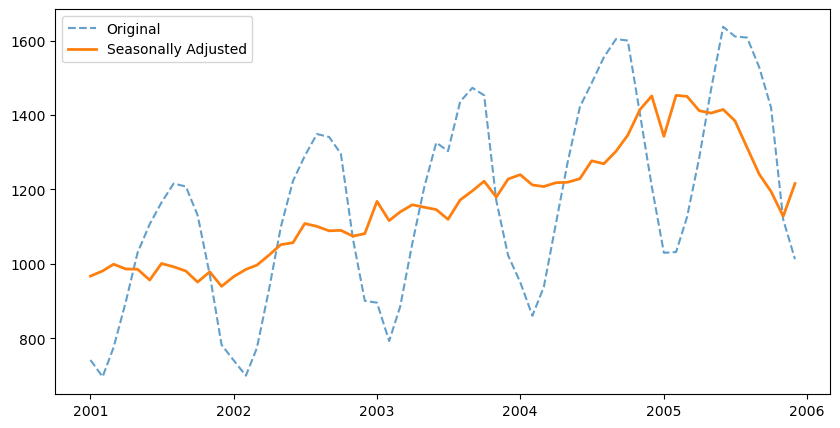

In [24]:
# d. Compute and plot the seasonally adjusted data.

plastics_SA = plastics['series'] / classical_decomp.seasonal

display(plastics_SA.head(10))

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(plastics, linestyle = 'dashed', label = 'Original', alpha = 0.7)
ax.plot(plastics_SA, linewidth = 2, label = 'Seasonally Adjusted')
ax.legend()
plt.show()

date
2001-01-01     967.346760
2001-02-01     981.226189
2001-03-01     999.318217
2001-04-01     986.475817
2001-05-01     985.892509
2001-06-01     956.782610
2001-07-01    1001.175903
2001-08-01     992.413940
2001-09-01     981.026290
2001-10-01     951.424051
Freq: MS, dtype: float64

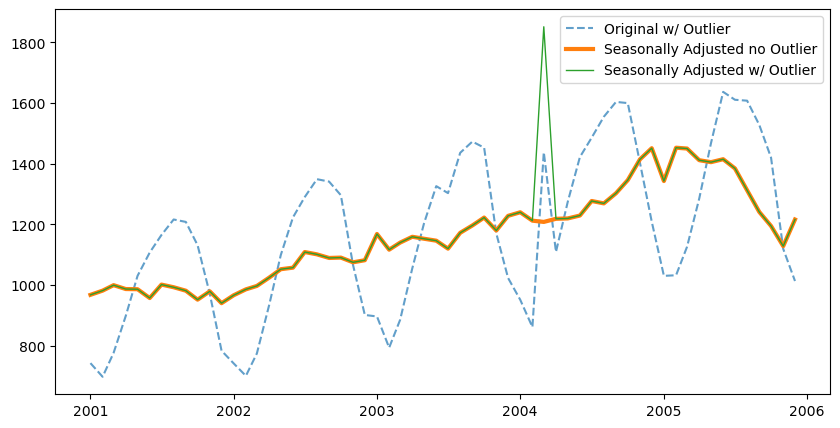

In [25]:
# e. Change one observation to be an outlier (e.g., add 500 to one observation), and recompute the seasonally adjusted data. What is the effect of the outlier?

np.random.seed(42)
plastics_outlier = plastics.copy(deep=True)
outlier = np.random.choice(plastics_outlier.index.astype(str))
plastics_outlier.loc[plastics_outlier.index == outlier, 'series'] = plastics_outlier.loc[plastics_outlier.index == outlier, 'series'] + 500

plastics_SA2 = plastics_outlier['series'] / classical_decomp.seasonal

display(plastics_SA2.head(10))

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(plastics_outlier, linestyle = 'dashed', label = 'Original w/ Outlier', alpha = 0.7)
ax.plot(plastics_SA, linewidth = 3, label = 'Seasonally Adjusted no Outlier')
ax.plot(plastics_SA2, linewidth = 1, label = 'Seasonally Adjusted w/ Outlier')
ax.legend()
plt.show()

date
2001-01-01     967.346760
2001-02-01     981.226189
2001-03-01     999.318217
2001-04-01     986.475817
2001-05-01     985.892509
2001-06-01     956.782610
2001-07-01    1001.175903
2001-08-01     992.413940
2001-09-01     981.026290
2001-10-01     951.424051
Freq: MS, dtype: float64

date
2001-01-01     967.346760
2001-02-01     981.226189
2001-03-01     999.318217
2001-04-01     986.475817
2001-05-01     985.892509
2001-06-01     956.782610
2001-07-01    1001.175903
2001-08-01     992.413940
2001-09-01     981.026290
2001-10-01     951.424051
Freq: MS, dtype: float64

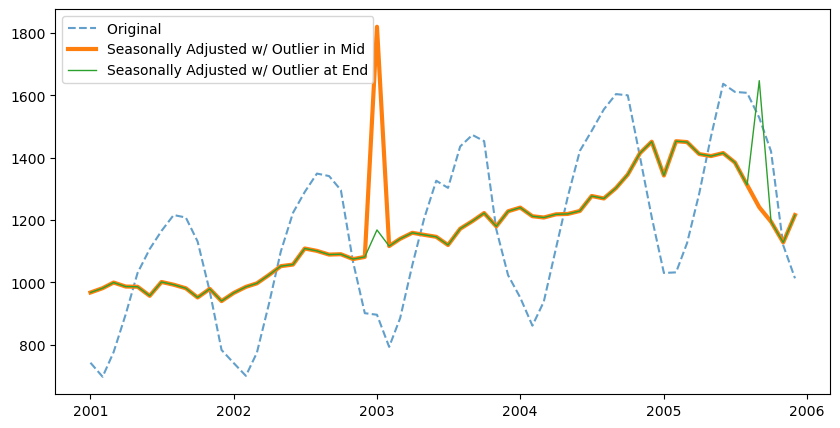

In [26]:
# f. Does it make any difference if the outlier is near the end rather than in the middle of the time series?

plastics_outlier_mid = plastics.copy(deep=True)
outlier_mid = '2003-01-01'
plastics_outlier_mid.loc[plastics_outlier_mid.index == outlier_mid, 'series'] = plastics_outlier_mid.loc[plastics_outlier_mid.index == outlier_mid, 'series'] + 500

plastics_outlier_end = plastics.copy(deep=True)
outlier_end = '2005-09-01'
plastics_outlier_end.loc[plastics_outlier_end.index == outlier_end, 'series'] = plastics_outlier_end.loc[plastics_outlier_end.index == outlier_end, 'series'] + 500

plastics_SA_mid = plastics_outlier_mid['series'] / classical_decomp.seasonal
plastics_SA_end = plastics_outlier_end['series'] / classical_decomp.seasonal

display(plastics_SA_mid.head(10))
display(plastics_SA_end.head(10))

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(plastics, linestyle = 'dashed', label = 'Original ', alpha = 0.7)
ax.plot(plastics_SA_mid, linewidth = 3, label = 'Seasonally Adjusted w/ Outlier in Mid')
ax.plot(plastics_SA_end, linewidth = 1, label = 'Seasonally Adjusted w/ Outlier at End')
ax.legend()
plt.show()

## KJ 3.1

## KJ 3.2

## HA 7.1

Consider the pigs series — the number of pigs slaughtered in Victoria each month.

a. Use the ses() function in R to find the optimal values of α and ℓ_0, and generate forecasts for the next four months.  
b. Compute a 95% prediction interval for the first forecast using $\hat{y}$ ± 1.96$s$ where $s$ is the standard deviation of the residuals. Compare your interval with the interval produced by R.

## HA 7.2

Write your own function to implement simple exponential smoothing. The function should take arguments y (the time series), alpha (the smoothing parameter α) and level (the initial level ℓ_0). It should return the forecast of the next observation in the series. Does it give the same forecast as ses()?

## HA 7.3

Modify your function from the previous exercise to return the sum of squared errors rather than the forecast of the next observation. Then use the optim() function to find the optimal values of α and ℓ_0. Do you get the same values as the ses() function?

## HA 8.1

a. Figure 8.31 shows the ACFs for 36 random numbers, 360 random numbers and 1,000 random numbers. Explain the differences among these figures. Do they all indicate that the data are white noise?  
b. Why are the critical values at different distances from the mean of zero? Why are the autocorrelations different in each figure when they each refer to white noise?

## HA 8.2

A classic example of a non-stationary series is the daily closing IBM stock price series (data set ibmclose). Use R to plot the daily closing prices for IBM stock and the ACF and PACF. Explain how each plot shows that the series is non-stationary and should be differenced.

## HA 8.6

Use R to simulate and plot some data from simple ARIMA models.

Use the following R code to generate data from an AR(1) model with ϕ_1 = 0.6 and σ_2 = 1. The process starts with y_1 = 0.  

    y <- ts(numeric(100))
    e <- rnorm(100)
    for(i in 2:100)
      y[i] <- 0.6*y[i-1] + e[i]

## HA 8.8

Consider austa, the total international visitors to Australia (in millions) for the period 1980-2015.

a. Use auto.arima() to find an appropriate ARIMA model. What model was selected. Check that the residuals look like white noise. Plot forecasts for the next 10 periods.  
b. Plot forecasts from an ARIMA(0,1,1) model with no drift and compare these to part a. Remove the MA term and plot again.  
c. Plot forecasts from an ARIMA(2,1,3) model with drift. Remove the constant and see what happens.  
d. Plot forecasts from an ARIMA(0,0,1) model with a constant. Remove the MA term and plot again.  
e. Plot forecasts from an ARIMA(0,2,1) model with no constant.